---
# <span style="color:pink">DS3000B/9000B Final Exam</span>

## <span style="color:pink">Student ID #: 251386495 </span>

## <span style="color:pink">Grade: --- / 60</span>

## <span style="color:pink">General Comments</span>

- Using generative AI tools such as ChatGPT and Copilot is considered an act of cheating and you will receive 0 mark for the exam.

- You are allowed to use any other resources on your computer or the internet, but you are **not** allowed to share documents, post questions to forums such as Stack Overflow (this includes use of homework helpers such as Chegg), or communicate in any way with people inside or outside the exam room.

- Having open on your computer any communication tools (*e.g.*, Discord, Teams, Slack, Outlook etc.) being either web-based or app-based (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the exam in the alloted time, you will have to work efficiently.

- Please read the entirety of each question carefully.

- You must have your work submitted by 5:00PM of April 16, 2024, to the "Assignments" section of the course's site on OWL, *i.e.*, the same place where you originally downloaded the notebook. Late submissions will be scored with 0 mark.

- To avoid technical difficulties at the time of submission, please initiate your submission process at the latest five minutes before the deadline.

- Some questions demand a **written answer**. Please answer these in full English sentences in a markdown cell right underneath the question.

- For your figures ensure that all axes are labeled in an informative way.

- Your submitted work must have the outputs of all cells as we may not run the whole notebook for grading.

## <span style="color:pink">Additional Guidance</span>

- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed accordingly.

- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with others.

- Where applicable, take advantage of the function argument `n_jobs=-1` to speed up processes with parallel computing.

- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you some time compared to pure scrolling with the mouse. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.

- Please ensure that your results are generated using the provided random seed, where applicable.

---
## <span style="color:orange">Toolbox</span>

In [122]:
# Throughout your work, use the seed defined below
import numpy as np; seed = 1604; np.random.seed(seed)
import warnings; warnings.filterwarnings('ignore')
import pandas as pd; pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

---
## Dataset Description

You will find two CSV files, i.e., "Q1_anomalous.csv" and "Q1_normal.csv". Each file represents real-world measurement data of a heat experiment inside a steel furnace. "Q1_normal.csv" has all the normal experimental samples, while "Q1_anomalous.csv" has all the abnormal experimental samples.

In the datasets, the attributes X1, X2, ..., X8 are the vibration measurements signals. Each feature represents a vibration signal inside the furnace at several frequency bands. Each sample is a measurement recorded at a time instance (the "Timestamp" attribute).

---
## Question 1 - <span style="color:red">[25]</span> - Classification

### Q1.1 - <span style="color:red">[3]</span> - Read "Q1_normal.csv" as a pandas dataframe and print out the tail and shape of it. Also, read "Q1_anomalous.csv" as a pandas dataframe and print out the head and shape of it.

In [137]:
#
normal_df = pd.read_csv('Q1_normal.csv')
anomalous_df = pd.read_csv('Q1_anomalous.csv')

print('-----Tail for the normal dataset:-----\n')
print(normal_df.tail())
print('-----Shape for the normal dataset:-----\n')
print(normal_df.shape)

print('-----Tail for the anomalous dataset:-----\n')
print(anomalous_df.head())
print('-----Shape for the normal dataset:-----\n')
print(anomalous_df.shape)

-----Tail for the normal dataset:-----

       Timestamp       X1       X2      X3      X4       X5      X6      X7  \
76588       3254  0.47554  0.99823  21.050  2.8235  0.47411  1.0094  18.208   
76589       3260  0.47104  0.99485  21.128  2.8356  0.53391  1.1550  21.879   
76590       3263  0.47282  1.00130  21.211  2.8488  0.47561  1.2447  24.159   
76591       3264  0.47165  0.99995  21.236  2.8573  0.47426  1.1809  24.473   
76592       3268  0.47900  1.01150  21.357  2.8638  0.55515  1.1256  22.742   

           X8  Anomaly_Tag  
76588  3.2173            0  
76589  2.8952            0  
76590  3.0822            0  
76591  3.1747            0  
76592  3.1582            0  
-----Shape for the normal dataset:-----

(76593, 10)
-----Tail for the anomalous dataset:-----

   Timestamp       X1      X2      X3      X4       X5       X6      X7  \
0       1378  0.76356  6.0467  391.61  523.48  0.92730  1.51430  6.5917   
1       1379  0.76313  6.0146  389.44  519.34  0.91443  1.42520  

### Q1.2 - <span style="color:red">[3]</span> - Concatenate the two dataframes from Q1.1, and with "Anomaly_Tag" as target, do a shuffled train/test split with a test size of 30%.

In [138]:
#
combined_df = pd.concat([normal_df, anomalous_df], ignore_index=True)
X = combined_df.drop('Anomaly_Tag', axis=1)
y = combined_df['Anomaly_Tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (55434, 9)
X_test shape: (23758, 9)
y_train shape: (55434,)
y_test shape: (23758,)


### Q1.3 - <span style="color:red">[10]</span> - Train an instance of each of the Decision Tree, Bagging, and Random Forest classifiers using their default arguments. Plot the feature importance for each classifier.

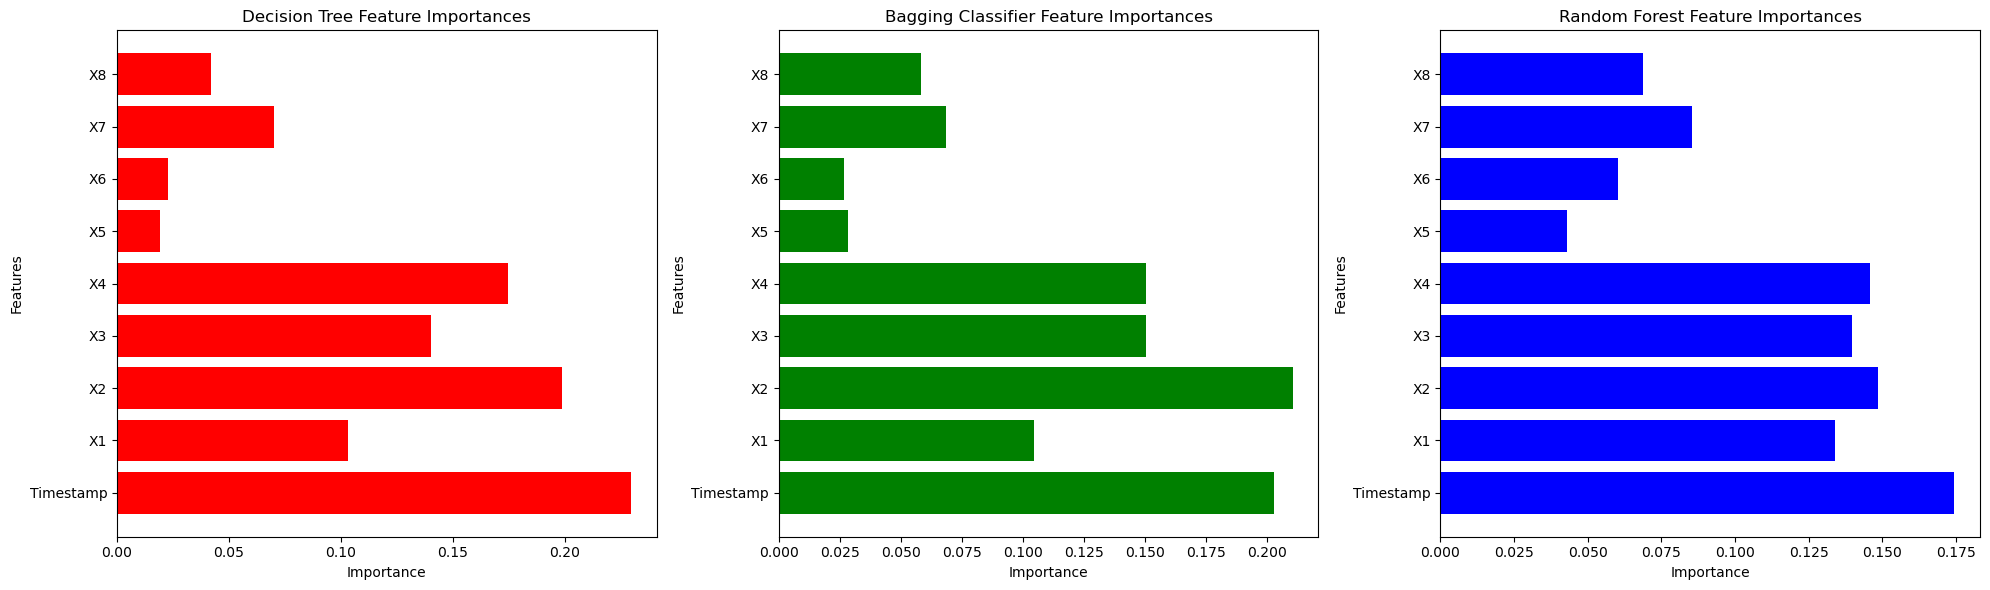

In [139]:
#
def fi_plot(bagging_model, feature_names, ax, title='Feature Importances'):
    base_estimators = bagging_model.estimators_
    importances = np.array([est.feature_importances_ for est in base_estimators if hasattr(est, 'feature_importances_')])
    avg_importances = np.mean(importances, axis=0)
    ax.barh(feature_names, avg_importances, color='Green')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')
    ax.set_title(title)

# Classifiers
dt_classifier = DecisionTreeClassifier(random_state=seed)
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=seed)
rf_classifier = RandomForestClassifier(random_state=seed)

dt_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Feature importances
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Decision Tree
axes[0].barh(X_train.columns, dt_classifier.feature_importances_, color='Red')
axes[0].set_title('Decision Tree Feature Importances')

# Bagging
fi_plot(bagging_classifier, X_train.columns, axes[1], 'Bagging Classifier Feature Importances')

# Random Forest
axes[2].barh(X_train.columns, rf_classifier.feature_importances_, color='Blue')
axes[2].set_title('Random Forest Feature Importances')

for ax in axes:
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()

### Q1.4 - <span style="color:red">[9]</span> - Report the performance of each model trained in Q1.3 using the metrics Recall, Precision, F1-score, and Confusion matrix. All on the test set.

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22963
           1       0.97      0.97      0.97       795

    accuracy                           1.00     23758
   macro avg       0.98      0.98      0.98     23758
weighted avg       1.00      1.00      1.00     23758



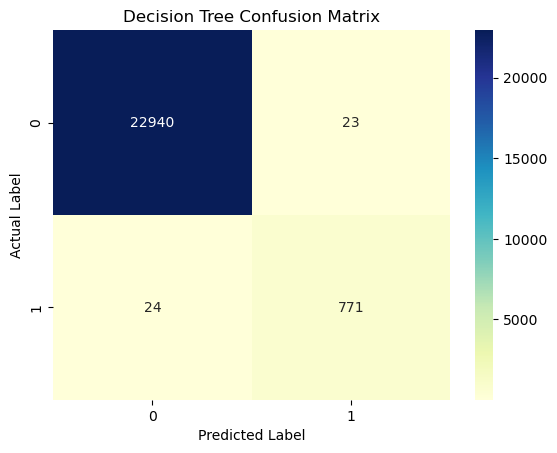

Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22963
           1       1.00      0.96      0.98       795

    accuracy                           1.00     23758
   macro avg       1.00      0.98      0.99     23758
weighted avg       1.00      1.00      1.00     23758



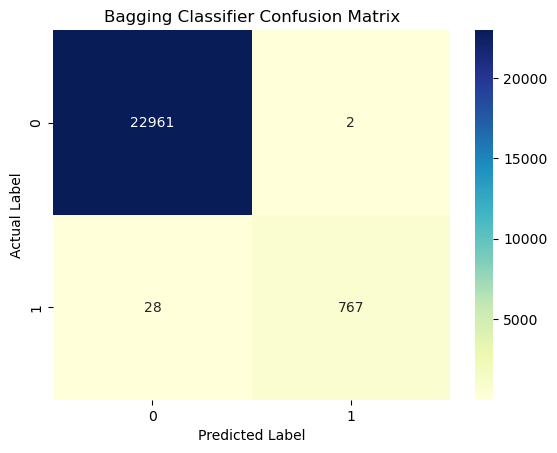

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22963
           1       1.00      0.97      0.98       795

    accuracy                           1.00     23758
   macro avg       1.00      0.98      0.99     23758
weighted avg       1.00      1.00      1.00     23758



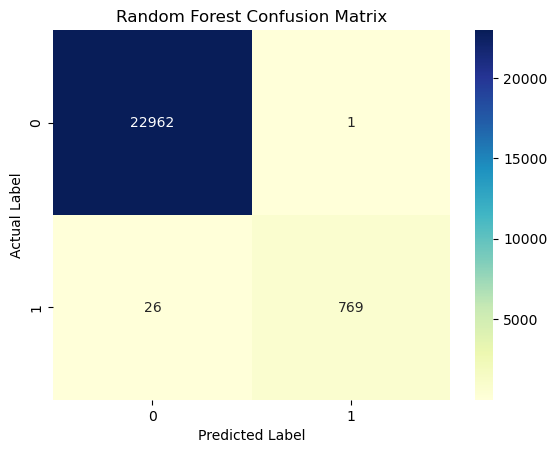

In [140]:
#
dt_y_pred = dt_pipeline.predict(X_test)
bagging_y_pred = bagging_pipeline.predict(X_test)
rf_y_pred = rf_pipeline.predict(X_test)

# Classification reports and Confusion Matrix
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))
cm1 = confusion_matrix(y_test, dt_y_pred)
p = sns.heatmap(pd.DataFrame(cm1), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("Bagging Classifier Classification Report:\n", classification_report(y_test, bagging_y_pred))
cm2 = confusion_matrix(y_test, bagging_y_pred)
p = sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Bagging Classifier Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
cm3 = confusion_matrix(y_test, rf_y_pred)
p = sns.heatmap(pd.DataFrame(cm3), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

---
## Question 2 - <span style="color:red">[25]</span> - Dimensionality Reduction

### Q2.1 - <span style="color:red">[6]</span> - Build and train a `Pipeline` that uses a PCA to extract 2 PCs of the training set and create a Random Forest model which consists of 25 base decision trees. How much variance the two PCs explain?

In [141]:
#
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('pca', PCA(n_components=2)), 
    ('rf', RandomForestClassifier(n_estimators=25, random_state=seed))  
])

# Fiting pipeline
pipeline.fit(X_train, y_train)
pca = pipeline.named_steps['pca']

print("Explained variance by each PC:", pca.explained_variance_ratio_)
print("Total variance explained by 2 PCs:", sum(pca.explained_variance_ratio_))

Explained variance by each PC: [0.35790574 0.20153344]
Total variance explained by 2 PCs: 0.5594391770937904


### Q2.2 - <span style="color:red">[3]</span> - Report the same metrics as Q1.4 to evaluate the pipeline of Q2.1.

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     22963
           1       0.34      0.13      0.19       795

    accuracy                           0.96     23758
   macro avg       0.66      0.56      0.59     23758
weighted avg       0.95      0.96      0.95     23758



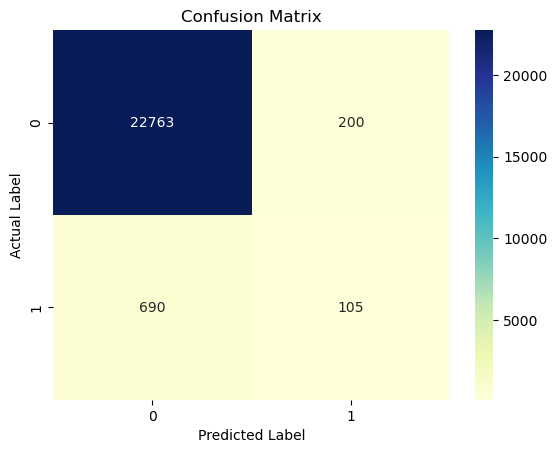

In [142]:
#
y_pred = pipeline.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm4), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Q2.3 - <span style="color:red">[8]</span> - Use a 4-fold grid search to see if you can make the performance of the pipeline any better (use cross-validated accuracy score as your basis for the comparison). Here are the hyperparameters to tune:

A) the number of base estimators in the forest, i.e., find the better value among the three numbers 10, 25, and 50,

B) the maximum tree depth, i.e., find the better value among the two numbers 10 and 20.

Finally, print out the detected better hyperparameter values and cross-validated score.

In [143]:
#
param_grid = {
    'rf__n_estimators': [10, 25, 50],  
    'rf__max_depth': [10, 20]  
}

# 4-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv = 4, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best cross-validated accuracy score:", best_score)

Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 50}
Best cross-validated accuracy score: 0.9679619005968936


### Q2.4 - <span style="color:red">[8]</span> - Compare the performance (i.e., based on test set) of the models trained in Q1.3 against your best pipe model. In a markdown cell, report your observations and conclusions. If you are asked to choose your final model solely based on the test set AUC of ROC, which model you select?

In [144]:
#
# From Q1.3
dt_y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]
bagging_y_pred_proba = bagging_classifier.predict_proba(X_test)[:, 1]
rf_y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# From Q2
best_pipe_y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# AUC
dt_auc = roc_auc_score(y_test, dt_y_pred_proba)
bagging_auc = roc_auc_score(y_test, bagging_y_pred_proba)
rf_auc = roc_auc_score(y_test, rf_y_pred_proba)
best_pipe_auc = roc_auc_score(y_test, best_pipe_y_pred_proba)

print("Decision Tree AUC: {:.4f}".format(dt_auc))
print("Bagging Classifier AUC: {:.4f}".format(bagging_auc))
print("Random Forest AUC: {:.4f}".format(rf_auc))
print("Best Pipeline (PCA + RF) AUC: {:.4f}".format(best_pipe_auc))

Decision Tree AUC: 0.9469
Bagging Classifier AUC: 0.9963
Random Forest AUC: 0.9997
Best Pipeline (PCA + RF) AUC: 0.9274


Based on the test AUC of ROC, Random Forest has the largest AUC which is better than others, since we prefer to have larger AUC (Close to 1).

---
## Question 3 - <span style="color:red">[10]</span> - Probability

The following function is a slightly modified version of the ant escape simulation problem which you had seen in Assignment 2. Every time you execute this function, it returns 1 if the ant manages to escape the box, else 0. Therefore, it simulates a data generating process with a binary sample space (i.e., escape). Do not modify the function, just run the following cell to load the function and proceed to the next question.

In [145]:
def ant_escape_simulation(distribution):
    """
    Returns 1 if the ant manages to escape the box in "time" seconds, otherwise 0.
    "distribution" determines what type of distribution the random number generator
    should follow to determine the ant's random walk in space.
    """
    x    = 50       # box size in x-direction
    y    = 50       # box size in y-direction
    time = 400      # seconds

    # coordinate of one arbitrary opening of size 5 mm
    x_open = [20, 30]
    y_open = y-1

    # distance in millimeters that the ant travels per second
    delta  = 2

    # initialize X and Y coordinates for the ant
    X = np.zeros([time])
    Y = np.zeros([time])

    # ant's initial location
    x_ant = x/2
    y_ant = y/2

    i = -1
    ## Main loop:
    for t in range(time):
        if distribution == "uniform":
            u = np.random.uniform(low=0.0, high=1.0)
        elif distribution == "normal":
            u = abs(np.random.normal())

        if ( u < 0.25 ):
            x_ant = x_ant - delta
        if ( u >= 0.25 ) & ( u < 0.5 ):
            x_ant = x_ant + delta
        if ( u >= 0.5 )  & ( u < 0.75 ):
            y_ant = y_ant + delta
        if ( u >= 0.75 ) & ( u <= 1 ):
            y_ant = y_ant - delta

        if (x_ant > 0) & (x_ant < x) & (y_ant > 0) & (y_ant < y):
            i += 1
            X[i] = x_ant
            Y[i] = y_ant
            x_ant_pre = x_ant
            y_ant_pre = y_ant
        else:
            while (x_ant <= 0) | (x_ant >= x) | (y_ant <= 0) | (y_ant >= y):
                if distribution == "uniform":
                    u = np.random.uniform(low=0.0, high=1.0)
                elif distribution == "normal":
                    u = abs(np.random.normal())

                if ( u < 0.25 ):
                    x_ant = x_ant_pre - delta
                if ( u >= 0.25 ) & ( u < 0.5 ):
                    x_ant = x_ant_pre + delta
                if ( u >= 0.5 ) & ( u < 0.75 ):
                    y_ant = y_ant_pre + delta
                if ( u >= 0.75 ) & ( u <= 1 ):
                    y_ant = y_ant_pre - delta

            i += 1
            X[i] = x_ant
            Y[i] = y_ant

        # check if the ant escapes through the opening
        if (X[i] >= x_open[0]) & (X[i] <= x_open[-1]) & (Y[i] == y_open):
            return 1
            break
    return 0

### Q3.1 - <span style="color:red">[10]</span> - Using "uniform" distribution for the ant's random walk in the function, run 300 experiments to approximate and plot the probability mass function of escape for 10 attempts of the ant. Redo this with "normal" distribution for the random walk. Your final product should be one plot window with two overlaid KDE plots: one for the case of uniform distribution and one for the normal. Report the expected value of escape for both cases. With which distribution the ant is more likely to escape?   

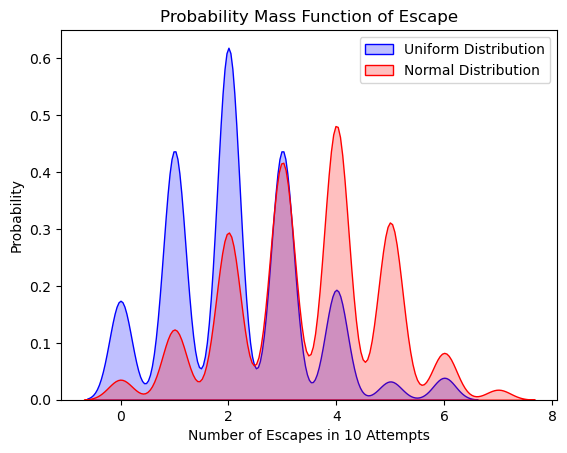

Expected number of escapes (Uniform): 2.15
Expected number of escapes (Normal): 3.44


In [146]:
def run_experiments(n_experiments, n_attempts, distribution):
    results = []
    for _ in range(n_experiments):
        escapes = sum(ant_escape_simulation(distribution) for _ in range(n_attempts))
        results.append(escapes)
    return results

n_experiments = 300
n_attempts = 10

results_uniform = run_experiments(n_experiments, n_attempts, "uniform")
results_normal = run_experiments(n_experiments, n_attempts, "normal")

expected_uniform = np.mean(results_uniform)
expected_normal = np.mean(results_normal)

sns.kdeplot(results_uniform, bw_adjust=0.5, fill=True, label='Uniform Distribution', color='blue')
sns.kdeplot(results_normal, bw_adjust=0.5, fill=True, label='Normal Distribution', color='red')
plt.xlabel('Number of Escapes in 10 Attempts')
plt.ylabel('Probability')
plt.title('Probability Mass Function of Escape')
plt.legend()
plt.show()

print("Expected number of escapes (Uniform):", expected_uniform)
print("Expected number of escapes (Normal):", expected_normal)

With Normal distribution the ant is more likely to escape because it has more expected number of escapes. 

$$\mathit{The\;End}$$